In [1]:
# prompt: insert nessasary libraries

import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt

# For statistical tests
import scipy.stats as stats

# For reading and writing data
import pickle


In [2]:
# prompt: insert google drive access

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df_emoji0 = pd.read_csv("/content/drive/MyDrive/Sentiment Analysis/dataset/Emoji_Sentiment_Data.csv")
df_emoticon0 = df_emoji0
df_emoticon0.head(5)

,Emoji,Unicode codepoint,Occurrences,Position,Negative,Neutral,Positive,Unicode name,Unicode block
0,😂,0x1f602,14622,0.805101,3614,4163,6845,FACE WITH TEARS OF JOY,Emoticons
1,❤,0x2764,8050,0.746943,355,1334,6361,HEAVY BLACK HEART,Dingbats
2,♥,0x2665,7144,0.753806,252,1942,4950,BLACK HEART SUIT,Miscellaneous Symbols
3,😍,0x1f60d,6359,0.765292,329,1390,4640,SMILING FACE WITH HEART-SHAPED EYES,Emoticons
4,😭,0x1f62d,5526,0.803352,2412,1218,1896,LOUDLY CRYING FACE,Emoticons


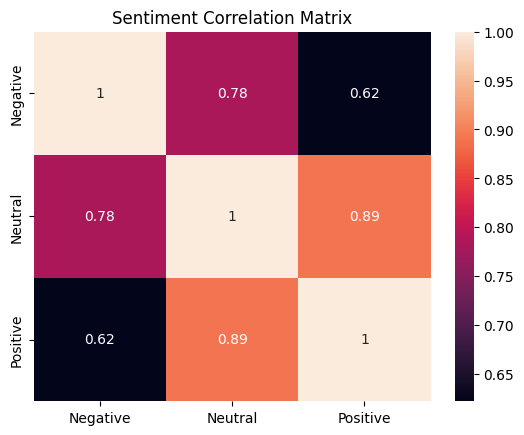

In [4]:
# @title Sentiment Correlation Matrix

import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df_emoticon0[['Negative', 'Neutral', 'Positive']].corr(), annot=True)
_ = plt.title('Sentiment Correlation Matrix')

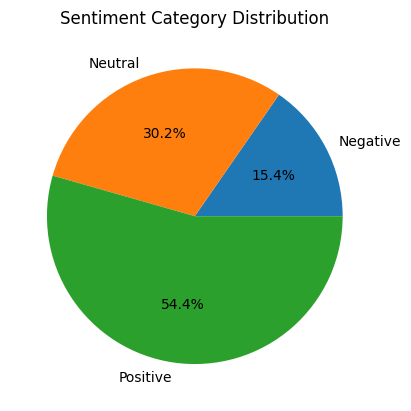

In [5]:
# @title Sentiment Category Distribution

import matplotlib.pyplot as plt
plt.pie([df_emoticon0['Negative'].sum(), df_emoticon0['Neutral'].sum(), df_emoticon0['Positive'].sum()], labels=['Negative', 'Neutral', 'Positive'], autopct='%1.1f%%')
_ = plt.title('Sentiment Category Distribution')

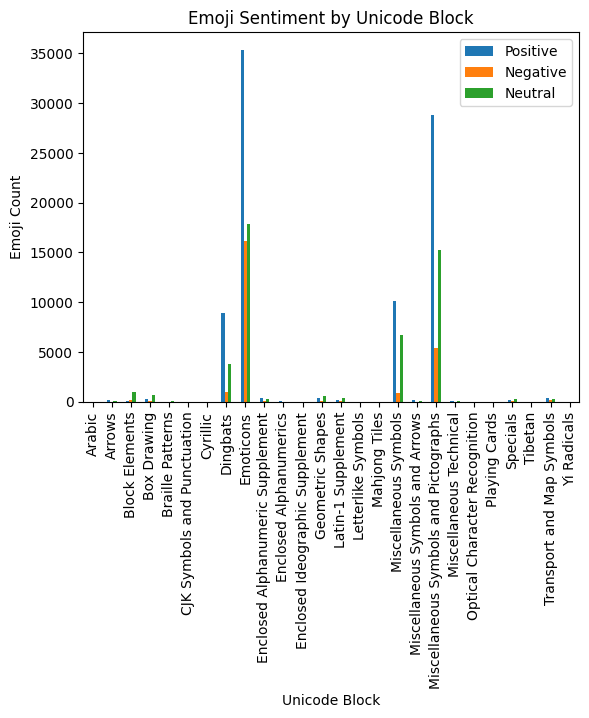

In [6]:
# @title Emoji Sentiment by Unicode Block

import matplotlib.pyplot as plt
df_emoticon0.groupby(['Unicode block'])[['Positive', 'Negative', 'Neutral']].sum().plot(kind='bar')
plt.xlabel('Unicode Block')
plt.ylabel('Emoji Count')
_ = plt.title('Emoji Sentiment by Unicode Block')

In [7]:
# Setup the data for emoji

df_emoji = pd.read_csv("/content/drive/MyDrive/Sentiment Analysis/dataset/Emoji_Sentiment_Data.csv")
df_emoji = df_emoji[df_emoji['Unicode block'] == 'Emoticons']
df_emoji.reset_index(inplace=True, drop=True)
df_emoji.head(5)

,Emoji,Unicode codepoint,Occurrences,Position,Negative,Neutral,Positive,Unicode name,Unicode block
0,😂,0x1f602,14622,0.805101,3614,4163,6845,FACE WITH TEARS OF JOY,Emoticons
1,😍,0x1f60d,6359,0.765292,329,1390,4640,SMILING FACE WITH HEART-SHAPED EYES,Emoticons
2,😭,0x1f62d,5526,0.803352,2412,1218,1896,LOUDLY CRYING FACE,Emoticons
3,😘,0x1f618,3648,0.854480,193,702,2753,FACE THROWING A KISS,Emoticons
4,😊,0x1f60a,3186,0.813302,189,754,2243,SMILING FACE WITH SMILING EYES,Emoticons


In [8]:
# compare the polarity of the dataset and turn the polarity to binary
# 0 = negative, 1= positive
polarity_ls = []
for index, row in df_emoticon0.iterrows():

    # polarity == sentiment
    # initial polarity is negative
    polarity = 0

    # positive if positive value is greater than negative value
    arg_1 = row['Positive'] > row['Negative']

    # positive if neutral value is odd and positive and negative value are equal
    arg_2 = row['Positive'] == row['Negative'] and row['Neutral'] % 2 != 0

    # positive if either of the two arguments are true
    if arg_1 or arg_2:
        polarity = 1
    polarity_ls.append(polarity)

# create new emoji dataset
df_emoticon2 = pd.DataFrame(polarity_ls, columns=['sentiment'])
df_emoticon2['emoji'] = df_emoticon0['Emoji'].values
df_emoticon2['name'] = df_emoticon0['Unicode name'].values
df_emoticon2

,sentiment,emoji,name
0,1,😂,FACE WITH TEARS OF JOY
1,1,❤,HEAVY BLACK HEART
2,1,♥,BLACK HEART SUIT
3,1,😍,SMILING FACE WITH HEART-SHAPED EYES
4,0,😭,LOUDLY CRYING FACE
...,...,...,...
964,1,➛,DRAFTING POINT RIGHTWARDS ARROW
965,1,♝,BLACK CHESS BISHOP
966,1,❋,HEAVY EIGHT TEARDROP-SPOKED PROPELLER ASTERISK
967,1,✆,TELEPHONE LOCATION SIGN


## Create Separate Sentiment Polarity Emoticon Dataset

In [9]:
def create_senti_dataset(df, polarity):
    emoticon_df = df.loc[df['sentiment'] == polarity]
    df_emoticon_df = pd.DataFrame(emoticon_df)
    df_emoticon_df.reset_index(inplace=True, drop=True)
    return df_emoticon_df

In [10]:
df_emoticon_pos = create_senti_dataset(df_emoticon2, 1)
df_emoticon_pos

,sentiment,emoji,name
0,1,😂,FACE WITH TEARS OF JOY
1,1,❤,HEAVY BLACK HEART
2,1,♥,BLACK HEART SUIT
3,1,😍,SMILING FACE WITH HEART-SHAPED EYES
4,1,😘,FACE THROWING A KISS
...,...,...,...
790,1,➛,DRAFTING POINT RIGHTWARDS ARROW
791,1,♝,BLACK CHESS BISHOP
792,1,❋,HEAVY EIGHT TEARDROP-SPOKED PROPELLER ASTERISK
793,1,✆,TELEPHONE LOCATION SIGN


In [11]:
df_emoticon_neg = create_senti_dataset(df_emoticon2, 0)
df_emoticon_neg

,sentiment,emoji,name
0,0,😭,LOUDLY CRYING FACE
1,0,😩,WEARY FACE
2,0,😒,UNAMUSED FACE
3,0,😔,PENSIVE FACE
4,0,█,FULL BLOCK
...,...,...,...
169,0,🕔,CLOCK FACE FIVE OCLOCK
170,0,🈂,SQUARED KATAKANA SA
171,0,🎰,SLOT MACHINE
172,0,҂,CYRILLIC THOUSANDS SIGN


# Emoji data all

In [12]:
_cols = ['Emoji', 'Negative', 'Neutral', 'Positive', 'Unicode name']
df_emoji = pd.read_csv("/content/drive/MyDrive/Sentiment Analysis/dataset/Emoji_Sentiment_Data.csv", usecols=_cols)
df_emoji

,Emoji,Negative,Neutral,Positive,Unicode name
0,😂,3614,4163,6845,FACE WITH TEARS OF JOY
1,❤,355,1334,6361,HEAVY BLACK HEART
2,♥,252,1942,4950,BLACK HEART SUIT
3,😍,329,1390,4640,SMILING FACE WITH HEART-SHAPED EYES
4,😭,2412,1218,1896,LOUDLY CRYING FACE
...,...,...,...,...,...
964,➛,0,1,0,DRAFTING POINT RIGHTWARDS ARROW
965,♝,0,1,0,BLACK CHESS BISHOP
966,❋,0,1,0,HEAVY EIGHT TEARDROP-SPOKED PROPELLER ASTERISK
967,✆,0,1,0,TELEPHONE LOCATION SIGN


In [13]:
# compare the polarity of the dataset and turn the polarity to binary
# 0 = negative, 1= positive
polarity_ls = []
for index, row in df_emoji.iterrows():

    # polarity == sentiment
    # initial polarity is negative
    polarity = 0

    # positive if positive value is greater than negative value
    arg_1 = row['Positive'] > row['Negative']

    # positive if neutral value is odd and positive and negative value are equal
    arg_2 = row['Positive'] == row['Negative'] and row['Neutral'] % 2 != 0

    # positive if either of the two arguments are true
    if arg_1 or arg_2:
        polarity = 1
    polarity_ls.append(polarity)

# create new emoji dataset
df_emoji2 = pd.DataFrame(polarity_ls, columns=['sentiment'])
df_emoji2['emoji'] = df_emoji['Emoji'].values
df_emoji2['name'] = df_emoji['Unicode name'].values
df_emoji2

,sentiment,emoji,name
0,1,😂,FACE WITH TEARS OF JOY
1,1,❤,HEAVY BLACK HEART
2,1,♥,BLACK HEART SUIT
3,1,😍,SMILING FACE WITH HEART-SHAPED EYES
4,0,😭,LOUDLY CRYING FACE
...,...,...,...
964,1,➛,DRAFTING POINT RIGHTWARDS ARROW
965,1,♝,BLACK CHESS BISHOP
966,1,❋,HEAVY EIGHT TEARDROP-SPOKED PROPELLER ASTERISK
967,1,✆,TELEPHONE LOCATION SIGN


# Method 1: Manipulating the text-only tweets dataset

In [14]:
# 1.6M twitter dataset
filename = '/content/drive/MyDrive/Colab Notebooks/SentimentAnalysis/Project_Data.csv'
# read the file
df_posts = pd.read_csv(filename, encoding='latin-1')
df_posts = pd.DataFrame(df_posts)
df_posts

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [15]:
df_posts.columns = ['col1', 'col2', 'col3', 'col4','col5','col6']

# now select by name
df_posts['col6']

0          is upset that he can't update his Facebook by ...
1          @Kenichan I dived many times for the ball. Man...
2            my whole body feels itchy and like its on fire 
3          @nationwideclass no, it's not behaving at all....
4                              @Kwesidei not the whole crew 
                                 ...                        
1599994    Just woke up. Having no school is the best fee...
1599995    TheWDB.com - Very cool to hear old Walt interv...
1599996    Are you ready for your MoJo Makeover? Ask me f...
1599997    Happy 38th Birthday to my boo of alll time!!! ...
1599998    happy #charitytuesday @theNSPCC @SparksCharity...
Name: col6, Length: 1599999, dtype: object

### Removing word and tags from the tweets
we will remove them since hyperlinks and tags don't add much to the sentiment of the post

In [16]:
import re

# Define a function to clean the text
def clean_text(text):
    # Remove hyperlinks
    text = re.sub(r'http\S+', '', text)

    # Remove tags
    text = re.sub(r'@\w+', '', text)

    return text

# Apply the clean_text function to the 'col6' column
df_posts['col6'] = df_posts['col6'].apply(clean_text)

# Print the DataFrame with the cleaned text
print(df_posts['col6'])

0          is upset that he can't update his Facebook by ...
1           I dived many times for the ball. Managed to s...
2            my whole body feels itchy and like its on fire 
3           no, it's not behaving at all. i'm mad. why am...
4                                        not the whole crew 
                                 ...                        
1599994    Just woke up. Having no school is the best fee...
1599995    TheWDB.com - Very cool to hear old Walt interv...
1599996    Are you ready for your MoJo Makeover? Ask me f...
1599997    Happy 38th Birthday to my boo of alll time!!! ...
1599998                            happy #charitytuesday    
Name: col6, Length: 1599999, dtype: object


In [17]:
df_posts['col1'] = df_posts['col1'].replace(4, 1)
df_posts

,col1,col2,col3,col4,col5,col6
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball. Managed to s...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am..."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,not the whole crew
...,...,...,...,...,...,...
1599994,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [18]:
# Remove duplicates from the DataFrame
df_posts = df_posts.drop_duplicates()

# Fill empty cells with '...'
df_posts = df_posts.fillna('...')

# Print the updated DataFrame
print(df_posts)

         col1        col2                          col3      col4  \
0           0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1           0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2           0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3           0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4           0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
...       ...         ...                           ...       ...   
1599994     1  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599995     1  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996     1  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997     1  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998     1  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    col5                                               col6  
0          scotthamilton  is upset that he can't update his Facebook by ...  
1              

In [19]:
# Create a new DataFrame with 'sentiment' and 'post' columns
df_selected = df_posts.iloc[:, [0, 5]].copy()
df_selected.columns = ['sentiment', 'post']

# Remove duplicates from the new DataFrame
df_selected = df_selected.drop_duplicates()

# Fill empty cells with '...' in the new DataFrame
df_selected = df_selected.fillna('...')

# Print the updated new DataFrame
print(df_selected)

         sentiment                                               post
0                0  is upset that he can't update his Facebook by ...
1                0   I dived many times for the ball. Managed to s...
2                0    my whole body feels itchy and like its on fire 
3                0   no, it's not behaving at all. i'm mad. why am...
4                0                                not the whole crew 
...            ...                                                ...
1599994          1  Just woke up. Having no school is the best fee...
1599995          1  TheWDB.com - Very cool to hear old Walt interv...
1599996          1  Are you ready for your MoJo Makeover? Ask me f...
1599997          1  Happy 38th Birthday to my boo of alll time!!! ...
1599998          1                          happy #charitytuesday    

[1558672 rows x 2 columns]


In [20]:
df_selected.head(10)

,sentiment,post
0,0,is upset that he can't update his Facebook by ...
1,0,I dived many times for the ball. Managed to s...
2,0,my whole body feels itchy and like its on fire
3,0,"no, it's not behaving at all. i'm mad. why am..."
4,0,not the whole crew
5,0,Need a hug
6,0,"hey long time no see! Yes.. Rains a bit ,onl..."
7,0,nope they didn't have it
8,0,que me muera ?
9,0,spring break in plain city... it's snowing


### Fill up empty post cells
some tweets only contain tags. some post rows might now contain empty cells, we will fill it up with '...'

In [21]:
tp_df = df_selected

In [22]:
tp_df.to_csv('/content/drive/MyDrive/Sentiment Analysis/dataset/processed_tweet_dataset.csv')

# Method 2: Creating new data and randomizing emoticons

In [28]:
csv_twt_pos = pd.read_csv("/content/drive/MyDrive/Sentiment Analysis/dataset/raw_data_tweets/processedPositive.csv")
csv_twt_neg = pd.read_csv("/content/drive/MyDrive/Sentiment Analysis/dataset/raw_data_tweets/processedNegative.csv")

In [29]:
csv_twt_pos

,An inspiration in all aspects: Fashion,fitness,beauty and personality. :) :* TheFashionIcon,Apka Apna Awam Ka Channel Frankline Tv Aam Admi Production Please Visit Or Likes Share :) Fb Page :...,Beautiful album from the greatest unsung guitar genius of our time - and I've met the great backstage,Good luck to Rich riding for great project in this Sunday. Can you donate?,Omg he... kissed... him crying with joy,happy anniv ming and papi!!!!! love love happy,thanks happy,C'mon Tweeps,...,$ES_F $SPY Bulls are just relentless happy Some setups I like today,Thanks for the recent follow Happy to connect happy have a great Thursday..33,Thanks for the recent follow Happy to connect happy have a great Thursday. Want this.5,Thanks for the recent follow Happy to connect happy have a great Thursday. Want this.7,you know that the problem still exist :D,Thanks for the recent follow Happy to connect happy have a great Thursday. Get this.1,#NAME?.1,ngam to weeks left for cadet pilot exam crying with joy,Great! You're welcome Josh happy ^Adam,Sixth spot not applicable Team! Higher pa! :) :* TheFashionIcon.1


In [30]:
csv_twt_neg


,How unhappy some dogs like it though,talking to my over driver about where I'm goinghe said he'd love to go to New York too but since Trump it's probably not,Does anybody know if the Rand's likely to fall against the dollar? I got some money I need to change into R but it keeps getting stronger unhappy,I miss going to gigs in Liverpool unhappy,There isnt a new Riverdale tonight ? unhappy,it's that A*dy guy from pop Asia and then the translator so they'll probs go with them around Aus unhappy,Who's that chair you're sitting in? Is this how I find out. Everyone knows now. You've shamed me in pu,don't like how jittery caffeine makes me sad,My area's not on the list unhappy think I'll go LibDems anyway,I want fun plans this weekend unhappy,...,and yet if parents invest in child's emotional education by taking child out of school on holiday early that's un,YG should have sent them to MCD. I want to see them holding the trophy unhappy anyways .9,i want more orientation unhappy,unhappy they not,YG should have sent them to MCD. I want to see them holding the trophy unhappy anyways .10,wish knock out lang talaga for the new school year are good and cooperative groupmates please unhappy,i miss so much unhappy,Same unhappy .1,Hi instant message your friend friend lang,hindi close friend? unhappy


### Data Cleaning for the tweet dataset
the dataset is listed by column.
We will list in by row and assign a sentiment polarity value (1 & 0, positive and negative respectively)

In [31]:
def get_tweet_polarity(df, polarity):
    dpos = {'Text': list(df.columns.values), 'Sentiment': polarity}
    df_twt = pd.DataFrame(data = dpos).iloc[:1000]
    return df_twt

In [32]:
df_twt_pos = get_tweet_polarity(csv_twt_pos, 1)
df_twt_pos

,Text,Sentiment
0,An inspiration in all aspects: Fashion,1
1,fitness,1
2,beauty and personality. :) :* TheFashionIcon,1
3,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,1
4,Beautiful album from the greatest unsung guit...,1
5,Good luck to Rich riding for great project in ...,1
6,Omg he... kissed... him crying with joy,1
7,happy anniv ming and papi!!!!! love love happy,1
8,thanks happy,1
9,C'mon Tweeps,1


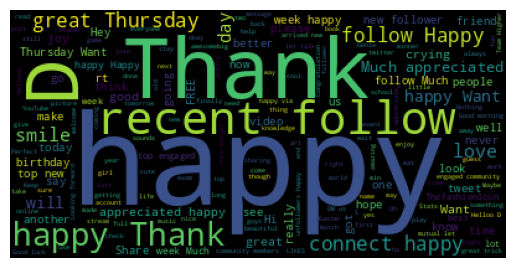

In [33]:
# @title Most Frequent Words in Positive Tweets

import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud().generate(' '.join(df_twt_pos['Text']))
plt.imshow(wordcloud)
_ = plt.axis('off')

In [34]:
df_twt_neg = get_tweet_polarity(csv_twt_neg, 0)
df_twt_neg

,Text,Sentiment
0,How unhappy some dogs like it though,0
1,talking to my over driver about where I'm goin...,0
2,Does anybody know if the Rand's likely to fall...,0
3,I miss going to gigs in Liverpool unhappy,0
4,There isnt a new Riverdale tonight ? unhappy,0
5,it's that A*dy guy from pop Asia and then the ...,0
6,Who's that chair you're sitting in? Is this ho...,0
7,don't like how jittery caffeine makes me sad,0
8,My area's not on the list unhappy think I'll ...,0
9,I want fun plans this weekend unhappy,0


In [35]:
df_emoticon_pos

,sentiment,emoji,name
0,1,😂,FACE WITH TEARS OF JOY
1,1,❤,HEAVY BLACK HEART
2,1,♥,BLACK HEART SUIT
3,1,😍,SMILING FACE WITH HEART-SHAPED EYES
4,1,😘,FACE THROWING A KISS
5,1,😊,SMILING FACE WITH SMILING EYES
6,1,👌,OK HAND SIGN
7,1,💕,TWO HEARTS
8,1,👏,CLAPPING HANDS SIGN
9,1,😁,GRINNING FACE WITH SMILING EYES


In [36]:
df_emoticon_neg

,sentiment,emoji,name
0,0,😭,LOUDLY CRYING FACE
1,0,😩,WEARY FACE
2,0,😒,UNAMUSED FACE
3,0,😔,PENSIVE FACE
4,0,█,FULL BLOCK
5,0,😡,POUTING FACE
6,0,😴,SLEEPING FACE
7,0,🔫,PISTOL
8,0,😞,DISAPPOINTED FACE
9,0,😪,SLEEPY FACE


### Convert the ASCII emoji into Emoticon symbols

In [37]:
# corresponding emoticon sysmbols
txt_emoji = [
    ':)', ':P', ':D', ':|', ":'(", ':O', ":*", '<3', ':(', ';)',
    'xD', ':/', '=D'
]
txt_emoji_pic =[
    '😊', '😛', '😄', '😐', '😢', '😲', '😘', '😍', '😧', '😉',
    '😁', '😒', '😀'
]

In [38]:
# prompt:

# create a function to convert ASCII emoji to emoticon symbols
def convert_emoji(text):
    for i in range(len(txt_emoji)):
        text = text.replace(txt_emoji[i], txt_emoji_pic[i])
    return text
# apply the function to the text column of the positive and negative tweet datasets
df_twt_pos['Text'] = df_twt_pos['Text'].apply(convert_emoji)
df_twt_neg['Text'] = df_twt_neg['Text'].apply(convert_emoji)
# display the updated dataframes
df_twt_pos
df_twt_neg


,Text,Sentiment
0,How unhappy some dogs like it though,0
1,talking to my over driver about where I'm goin...,0
2,Does anybody know if the Rand's likely to fall...,0
3,I miss going to gigs in Liverpool unhappy,0
4,There isnt a new Riverdale tonight ? unhappy,0
5,it's that A*dy guy from pop Asia and then the ...,0
6,Who's that chair you're sitting in? Is this ho...,0
7,don't like how jittery caffeine makes me sad,0
8,My area's not on the list unhappy think I'll ...,0
9,I want fun plans this weekend unhappy,0


### Simulation of emoticons
here we will find each text based emojis and convert them into utf-8 emoticon symbols.
We will also add emoticons on half of the tweets to increase the sentiment value of the utf-8 emoticons

In [39]:
def emoji_conv(txt, conv_txt, conv_pic):
    temp = []
    for i in txt:
        for j in range(len(conv_txt)):
            if i == conv_txt[j]:
                i = conv_pic[j]
        temp.append(i)
    return ' '.join(temp)

In [40]:
def conv_emoticon_on_data(df_data):
    conv_text = []
    for idx, row in df_data.iterrows():
        txt = [i for i in row['Text'].split()]
        emoji_found = emoji_conv(txt, txt_emoji, txt_emoji_pic)
        conv_text.append(emoji_found)
    return conv_text

In [41]:
pos_conv_text = conv_emoticon_on_data(df_twt_pos)
pos_conv_text

['An inspiration in all aspects: Fashion',
 'fitness',
 'beauty and personality. 😊 😘 TheFashionIcon',
 'Apka Apna Awam Ka Channel Frankline Tv Aam Admi Production Please Visit Or Likes Share 😊 Fb Page :...',
 "Beautiful album from the greatest unsung guitar genius of our time - and I've met the great backstage",
 'Good luck to Rich riding for great project in this Sunday. Can you donate?',
 'Omg he... kissed... him crying with joy',
 'happy anniv ming and papi!!!!! love love happy',
 'thanks happy',
 "C'mon Tweeps",
 'Join vote for the singer! Do spread the word. 😄',
 'Thanks for the great review! smile',
 'Yay another art raffle! Everything you need to know is in the picture 😄',
 'Hello I hope you visit Luxor its amazing city in Egypt pleas check',
 'We got a Vive tracker in the office and our intern',
 "went to work.Don't get too excited",
 "this isn't",
 'Take a look at favourites.io You can do this and more happy',
 'Go back to school for music! I think I will in time happy',
 'Six

In [42]:
neg_conv_text = conv_emoticon_on_data(df_twt_neg)
neg_conv_text

['How unhappy some dogs like it though',
 "talking to my over driver about where I'm goinghe said he'd love to go to New York too but since Trump it's probably not",
 "Does anybody know if the Rand's likely to fall against the dollar? I got some money I need to change into R but it keeps getting stronger unhappy",
 'I miss going to gigs in Liverpool unhappy',
 'There isnt a new Riverdale tonight ? unhappy',
 "it's that A*dy guy from pop Asia and then the translator so they'll probs go with them around Aus unhappy",
 "Who's that chair you're sitting in? Is this how I find out. Everyone knows now. You've shamed me in pu",
 "don't like how jittery caffeine makes me sad",
 "My area's not on the list unhappy think I'll go LibDems anyway",
 'I want fun plans this weekend unhappy',
 'When can you notice me. unhappy what?',
 'Ahhhhh! You recognized LOGAN!!! Cinemax shows have a BAD track record for getting cancelled unhappy',
 "Errr dude.... They're gone unhappy Asked other league memeber to c

### Let's add emoticons for tweets containing the words below


In [43]:
# for additional inputs
add_emoji_txt = ['sad', 'unhappy', 'crying', 'smile', 'happy', 'love']
add_emoji_pic =['😔', '😧', '😆', '😭', '😊', '😍']

In [44]:
def add_emoji_text_data(df_data):
    reform_pos_text = []
    for ct in df_data:
        txt = [i for i in ct.split()]
        emoji_found = emoji_conv(txt, add_emoji_txt, add_emoji_pic)
        reform_pos_text.append(emoji_found)
    return reform_pos_text


In [45]:
pos_conv_text = add_emoji_text_data(pos_conv_text)
pos_conv_text

['An inspiration in all aspects: Fashion',
 'fitness',
 'beauty and personality. 😊 😘 TheFashionIcon',
 'Apka Apna Awam Ka Channel Frankline Tv Aam Admi Production Please Visit Or Likes Share 😊 Fb Page :...',
 "Beautiful album from the greatest unsung guitar genius of our time - and I've met the great backstage",
 'Good luck to Rich riding for great project in this Sunday. Can you donate?',
 'Omg he... kissed... him 😆 with joy',
 '😊 anniv ming and papi!!!!! 😍 😍 😊',
 'thanks 😊',
 "C'mon Tweeps",
 'Join vote for the singer! Do spread the word. 😄',
 'Thanks for the great review! 😭',
 'Yay another art raffle! Everything you need to know is in the picture 😄',
 'Hello I hope you visit Luxor its amazing city in Egypt pleas check',
 'We got a Vive tracker in the office and our intern',
 "went to work.Don't get too excited",
 "this isn't",
 'Take a look at favourites.io You can do this and more 😊',
 'Go back to school for music! I think I will in time 😊',
 'Sixth spot not applicable Team! Higher

In [46]:
neg_conv_text = add_emoji_text_data(neg_conv_text)
neg_conv_text

['How 😧 some dogs like it though',
 "talking to my over driver about where I'm goinghe said he'd 😍 to go to New York too but since Trump it's probably not",
 "Does anybody know if the Rand's likely to fall against the dollar? I got some money I need to change into R but it keeps getting stronger 😧",
 'I miss going to gigs in Liverpool 😧',
 'There isnt a new Riverdale tonight ? 😧',
 "it's that A*dy guy from pop Asia and then the translator so they'll probs go with them around Aus 😧",
 "Who's that chair you're sitting in? Is this how I find out. Everyone knows now. You've shamed me in pu",
 "don't like how jittery caffeine makes me 😔",
 "My area's not on the list 😧 think I'll go LibDems anyway",
 'I want fun plans this weekend 😧',
 'When can you notice me. 😧 what?',
 'Ahhhhh! You recognized LOGAN!!! Cinemax shows have a BAD track record for getting cancelled 😧',
 "Errr dude.... They're gone 😧 Asked other league memeber to check the guys are go",
 'Not you again 😔',
 'Why would Harvey be 

# Create the dataset of the processed emoji and tweet dataset


In [47]:
def new_df_emoji_tweet(data, polarity):
    temp = pd.DataFrame(columns=['sentiment', 'post'])
    temp['post'] = data
    temp['sentiment'] = polarity
    return temp

In [48]:
df_pos_tweets = new_df_emoji_tweet(pos_conv_text, 1)
df_pos_tweets

,sentiment,post
0,1,An inspiration in all aspects: Fashion
1,1,fitness
2,1,beauty and personality. 😊 😘 TheFashionIcon
3,1,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...
4,1,Beautiful album from the greatest unsung guita...
5,1,Good luck to Rich riding for great project in ...
6,1,Omg he... kissed... him 😆 with joy
7,1,😊 anniv ming and papi!!!!! 😍 😍 😊
8,1,thanks 😊
9,1,C'mon Tweeps


In [49]:
df_neg_tweets = new_df_emoji_tweet(neg_conv_text, 0)
df_neg_tweets

,sentiment,post
0,0,How 😧 some dogs like it though
1,0,talking to my over driver about where I'm goin...
2,0,Does anybody know if the Rand's likely to fall...
3,0,I miss going to gigs in Liverpool 😧
4,0,There isnt a new Riverdale tonight ? 😧
5,0,it's that A*dy guy from pop Asia and then the ...
6,0,Who's that chair you're sitting in? Is this ho...
7,0,don't like how jittery caffeine makes me 😔
8,0,My area's not on the list 😧 think I'll go LibD...
9,0,I want fun plans this weekend 😧


In [50]:
df_neg_tweets.to_csv("/content/drive/MyDrive/Sentiment Analysis/dataset/1k_data_tweets_emoticon_neg.csv")
df_pos_tweets.to_csv("/content/drive/MyDrive/Sentiment Analysis/dataset/1k_data_tweets_emoticon_pos.csv")

In [51]:
txt_emoji_pic =[
    '😊', '😛', '😄', '😐', '😢', '😲', '😘', '😍', '😧', '😉',
    '😁', '😒', '😀', '😔', '😧', '😆', '😭'
]

def emoji_checker(data_text):
    has_emoji = False
    for i in txt_emoji_pic:
        if i in data_text:
            has_emoji = True
    return has_emoji

def post_emoji_counter(df_tweets):
    c = 0
    for idx, row in df_tweets.iterrows():
        if emoji_checker(row['post']):
            c += 1
    return f'{c} / 1000'

In [52]:
print(post_emoji_counter(df_neg_tweets))
print(post_emoji_counter(df_pos_tweets))
df_neg_tweets2 = pd.DataFrame(df_neg_tweets)
df_pos_tweets2 = pd.DataFrame(df_pos_tweets)

797 / 1000
700 / 1000


## Trim each data to 500
we will trim the data to 500, and balance the numbers of tweets with and without emoticons
then we will merge the 500 size data of positive and negative to create a dataset containing 1000 data with balanced number of polarity and emoticon ratio

In [53]:
def idx_with_emoji(df_tweets):
    idx_wemo = []
    c = 500
    for idx, row in df_tweets.iterrows():
        has_emoji = emoji_checker(row['post'])
        if has_emoji: idx_wemo.append(idx)
        if has_emoji and c > 0 : c -= 1
        if c == 0 : break
    return idx_wemo

In [54]:
pos_idxs = idx_with_emoji(df_pos_tweets2)
neg_idxs = idx_with_emoji(df_neg_tweets2)
print(pos_idxs)

[2, 3, 6, 7, 8, 10, 11, 12, 17, 18, 19, 20, 21, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 47, 49, 50, 52, 54, 57, 58, 59, 61, 62, 63, 64, 65, 66, 68, 69, 71, 72, 73, 75, 76, 78, 79, 81, 83, 84, 85, 87, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 104, 105, 107, 109, 110, 111, 114, 115, 116, 117, 118, 119, 124, 125, 127, 130, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 147, 149, 150, 151, 152, 153, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178, 180, 182, 184, 185, 186, 187, 191, 193, 195, 196, 197, 198, 199, 201, 202, 203, 204, 205, 208, 210, 211, 213, 214, 215, 218, 219, 220, 221, 222, 224, 225, 226, 231, 232, 234, 235, 236, 238, 239, 241, 242, 243, 244, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 258, 261, 262, 263, 265, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 279, 280, 281, 283, 284, 285, 286, 287, 288, 289, 290, 293, 295, 296, 297, 299, 301, 302, 303, 305, 310

In [55]:
df_pos_500 = pd.DataFrame(df_pos_tweets2)
df_neg_500 = pd.DataFrame(df_neg_tweets2)

In [56]:
df_pos_500.drop(df_pos_500.index[pos_idxs], inplace=True)
df_pos_500.reset_index(inplace=True, drop=True)
df_pos_500

,sentiment,post
0,1,An inspiration in all aspects: Fashion
1,1,fitness
2,1,Beautiful album from the greatest unsung guita...
3,1,Good luck to Rich riding for great project in ...
4,1,C'mon Tweeps
5,1,Hello I hope you visit Luxor its amazing city ...
6,1,We got a Vive tracker in the office and our in...
7,1,went to work.Don't get too excited
8,1,this isn't
9,1,retweet this tweet if you want your to be incl...


In [57]:
df_neg_500.drop(df_neg_500.index[neg_idxs], inplace=True)
df_neg_500.reset_index(inplace=True, drop=True)
df_neg_500

,sentiment,post
0,0,Who's that chair you're sitting in? Is this ho...
1,0,Becoz if we will depend on your promoting its ...
2,0,For those asking
3,0,the application is Kana Kanji Funtime! Sadly
4,0,Yeah did update to 16.04
5,0,it froze a few times. Then went to 16.10
6,0,Shaandaar
7,0,Zabardast
8,0,Ah alright
9,0,i don%27t know if you saw my comment yet


### Append and shuffle the positive and negative dataset


In [58]:
import pandas as pd
from sklearn.utils import shuffle

df_tweet_1000 = pd.concat([df_pos_500, df_neg_500])
df_tweet_1000 = shuffle(df_tweet_1000)
df_tweet_1000.reset_index(inplace=True, drop=True)

In [59]:
df_tweet_1000

,sentiment,post
0,0,The manifesto
1,0,i havent been this early to school since last ...
2,1,A little bit overdramatic death 😊
3,0,koh
4,0,2017 at 08:45AM)
5,1,celebrate Hitler's birthday! 😀
6,1,have a great
7,1,Hello everyone
8,1,I write fiction. Some PR knob who writes sente...
9,0,Oh no 😧 what are you like?! Is it still in shops?


# Exporting

In [60]:
df_tweet_1000.to_csv('/content/drive/MyDrive/Sentiment Analysis/dataset/1k_data_emoji_tweets_senti_posneg.csv')

In [61]:
df_test = pd.read_csv('/content/drive/MyDrive/Sentiment Analysis/dataset/1k_data_emoji_tweets_senti_posneg.csv')
df_test

,Unnamed: 0,sentiment,post
0,0,0,The manifesto
1,1,0,i havent been this early to school since last ...
2,2,1,A little bit overdramatic death 😊
3,3,0,koh
4,4,0,2017 at 08:45AM)
5,5,1,celebrate Hitler's birthday! 😀
6,6,1,have a great
7,7,1,Hello everyone
8,8,1,I write fiction. Some PR knob who writes sente...
9,9,0,Oh no 😧 what are you like?! Is it still in shops?


In [62]:
df_emoticon0

,Emoji,Unicode codepoint,Occurrences,Position,Negative,Neutral,Positive,Unicode name,Unicode block
0,😂,0x1f602,14622,0.805101,3614,4163,6845,FACE WITH TEARS OF JOY,Emoticons
1,❤,0x2764,8050,0.746943,355,1334,6361,HEAVY BLACK HEART,Dingbats
2,♥,0x2665,7144,0.753806,252,1942,4950,BLACK HEART SUIT,Miscellaneous Symbols
3,😍,0x1f60d,6359,0.765292,329,1390,4640,SMILING FACE WITH HEART-SHAPED EYES,Emoticons
4,😭,0x1f62d,5526,0.803352,2412,1218,1896,LOUDLY CRYING FACE,Emoticons
5,😘,0x1f618,3648,0.854480,193,702,2753,FACE THROWING A KISS,Emoticons
6,😊,0x1f60a,3186,0.813302,189,754,2243,SMILING FACE WITH SMILING EYES,Emoticons
7,👌,0x1f44c,2925,0.805223,274,728,1923,OK HAND SIGN,Miscellaneous Symbols and Pictographs
8,💕,0x1f495,2400,0.765726,99,683,1618,TWO HEARTS,Miscellaneous Symbols and Pictographs
9,👏,0x1f44f,2336,0.787130,243,634,1459,CLAPPING HANDS SIGN,Miscellaneous Symbols and Pictographs


In [63]:
df_emo_ls = df_emoticon0[df_emoticon0['Emoji'].isin(txt_emoji_pic)]

In [64]:
# prompt:

df_emo_ls.to_csv('/content/drive/MyDrive/Sentiment Analysis/dataset/emoji_data_utf8.csv')
